In [1]:
#Run this notebook in the root directory of the project
%cd ../../../

/data/main/2024/GridCellsCond


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
import seaborn as sns
import sim_utils as s_utils
import analysis_utils as a_utils


## Subthreshold dynamics of stellate cells

### Post-inhibitory rebound

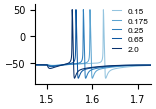

In [3]:
fig,ax= plt.subplots(1,1,figsize=(1.5,1.04))
plt.style.use("analysis/config/paper.mplstyle")
color = cm.Blues(np.linspace(0.4,1,5))

input_strength_arr = np.array([0.15,0.175,0.25,0.65,2])
sim_id = "VALD-ACVT-STDN-S-m-1a"
n_trials=1
sim_num = 0
for i,inhib_weight in enumerate(input_strength_arr):
    for tr in range(n_trials):
        params = s_utils.load_sim_params(sim_id)[f"{i}"]
        stell_v=s_utils.load_data(sim_id,"stell_v",sim_num=i)
        t=np.arange(0,params["sim_dur"],0.025)/1000
        ax.plot(t,stell_v,label=input_strength_arr[i],linewidth=0.75,c=color[i])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlim([1.475,1.73])
plt.ylim([-90,60])
plt.legend(fontsize=6,loc="upper right",ncol=1,labelspacing=0.3,borderaxespad=0,handlelength=1)
ax.tick_params(axis='both', which='major', labelsize=7)
plt.savefig('analysis/figures/Fig1/Fig1_A_top_left.svg')



### Depolarizing sag

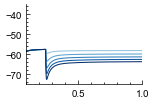

In [4]:

plt.style.use("analysis/config/paper.mplstyle")
fig,ax= plt.subplots(1,1,figsize=(1.5,1.04))
color = cm.Blues(np.linspace(0.4,1,5))

hyper_dc_arr = [-3.5e-3,-5.5e-3,-7.5e-3,-9.5e-3,-1.15e-2]
n_trials=1
sim_num = 0
sim_dur = float(1000)
sim_id = "VALD-ACVT-STDN-S-m-2a"
for i,hyper_dc in enumerate(hyper_dc_arr):
    for tr in range(n_trials):
        params = s_utils.load_sim_params(sim_id)[f"{i}"]
        stell_v=s_utils.load_data(sim_id,"stell_v",sim_num=i)
        t_1 = np.arange(0,params["sim_dur"]+0.025,0.025)/1000
        ax.plot(t_1,stell_v,label="Depolarising Sag",linewidth=0.75,c=color[i])


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlim([0.1,1])
plt.ylim([-75,-35])
ax.tick_params(axis='both', which='major', labelsize=7)
plt.savefig('analysis/figures/Fig1/Fig1_A_top_right.svg')



### Depolarizing sag (inset)

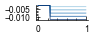

In [5]:
from network_configs.instrumentations.stdn_instr import input_profiles
plt.style.use("analysis/config/paper.mplstyle")
fig,ax= plt.subplots(1,1,figsize=(0.68,0.2))
color = cm.Blues(np.linspace(0.4,1,5))
hyper_dc_arr = [-3.5e-3,-5.5e-3,-7.5e-3,-9.5e-3,-1.15e-2]
n_trials=1
sim_num = 0
sim_dur = float(1000)
sim_id = "VALD-ACVT-STDN-S-m-2a"
for i,hyper_dc in enumerate(hyper_dc_arr):
    for tr in range(n_trials):
        params = s_utils.load_sim_params(sim_id)[f"{i}"]
        stell_v=s_utils.load_data(sim_id,"stell_v",sim_num=i)
        t_1 = np.arange(0,params["sim_dur"]+0.025,0.025)/1000
        input_prof = input_profiles(params)
        ax.plot(t_1,input_prof,label="Depolarising Sag",linewidth=0.5,c=color[i])



ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=6)
plt.savefig('analysis/figures/Fig1/Fig1_A_top_right_inset.svg')


### Subthrehshold oscillations

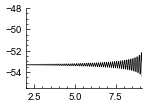

In [6]:
plt.style.use("analysis/config/paper.mplstyle")
sim_id = "VALD-ACVT-STDN-S-s-3a"
params = s_utils.load_sim_params(sim_id)
stell_spks_1,inrnrn_spks=s_utils.load_spikes(sim_id)
stell_v_1=s_utils.load_data(sim_id,"stell_v")
t_1 = np.arange(0,params["sim_dur"]+0.025,0.025)/1000
fig,ax= plt.subplots(1,1,figsize=(1.5,1.04))
ax.plot(t_1,stell_v_1,color ="k",label="Subthreshold Oscillations",linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlim([2,9.155])
plt.ylim([-55.5,-48])
plt.savefig('analysis/figures/Fig1/Fig1_A_bottom_left.svg')



### Subthrehshold oscillations (inset)

7.973048848961256


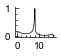

In [7]:
plt.style.use("analysis/config/paper.mplstyle")
f,y,p=a_utils.calc_fft(stell_v_1[int(250/0.025):int(9155/0.025)])
fourier_transform = np.fft.fft(stell_v_1[int(250/0.025):int(9155/0.025)])
freq = np.fft.fftfreq(len(stell_v_1[int(250/0.025):int(9155/0.025)]), d=0.025*1e-3)

# Calculate impedance
impedance_real = np.real(fourier_transform)
impedance_imaginary = np.imag(fourier_transform)
impedance_magnitude = np.abs(fourier_transform)
%matplotlib inline
fig,ax= plt.subplots(1,1,figsize=(0.53,0.39))
ax.plot(freq[1:150],impedance_magnitude[1:150]/(np.max(impedance_magnitude[1:150])),color = "k",label="Subthreshold Oscillations",linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.savefig('analysis/figures/Fig1/Fig1_A_bottom_left_inset.svg')
print(f[np.argmax(impedance_magnitude[1:150])+1])

### MP resonance

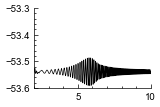

In [8]:

plt.style.use("analysis/config/paper.mplstyle")
sim_id = "VALD-ACVT-STDN-S-s-4a"
params = s_utils.load_sim_params(sim_id)
stell_spks_1,inrnrn_spks=s_utils.load_spikes(sim_id)
stell_v_1=s_utils.load_data(sim_id,"stell_v")
t_1 = np.arange(0,params["sim_dur"]+0.025,0.025)/1000
fig,ax= plt.subplots(1,1,figsize=(1.5,1.04))
ax.plot(t_1,stell_v_1,color ="k",label="MP Resonance",linewidth=0.5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlim([2,10])
plt.ylim([-53.6,-53.3])
ax.tick_params(axis='both', which='major', labelsize=7)
plt.savefig('analysis/figures/Fig1/Fig1_A_bottom_right.svg')



### MP resonance (inset)

7.799980500048749


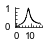

In [10]:
plt.style.use("analysis/config/paper.mplstyle")
f,y,p=a_utils.calc_fft(stell_v_1[:])
fourier_transform = np.fft.fft(stell_v_1[int(2000/0.025)::])
freq = np.fft.fftfreq(len(stell_v_1[int(2000/0.025)::]), d=0.025*1e-3)
# Calculate impedance
impedance_real = np.real(fourier_transform)
impedance_imaginary = np.imag(fourier_transform)
impedance_magnitude = np.abs(fourier_transform)
real = np.real(p)
imag = np.imag(p)
fig,ax= plt.subplots(1,1,figsize=(0.35,0.26))
ax.plot(freq[1:140],impedance_magnitude[1:140]/np.max(impedance_magnitude[1:140]),color = "k",label="Subthreshold Oscillations",linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.savefig('analysis/figures/Fig1/Fig1_A_bottom_right_inset.svg')
print(f[np.argmax(p[1:140])+1])